In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [5]:
# Importing models
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0136147
LotArea,0.0674861
OverallQual,0.214642
OverallCond,0.0954426
YearBuilt,0.16075
YearRemodAdd,0.0252969
BsmtFinSF1,0.0899544
BsmtUnfSF,-0.0325298
TotalBsmtSF,0.13748


###### Ridge Regression

In [8]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [9]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11430912602818623
0.11438831890699627
0.11452201329565981
0.11469744977061369
0.11490557532487583
0.11553053137615601
0.1162599646587543
0.11972299505022367
0.1277372905719841


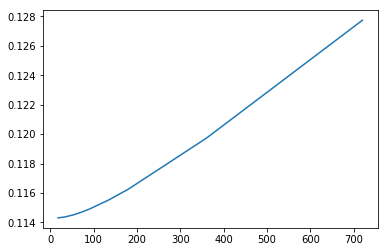

In [10]:
plt.plot(alphas, mses)

###### Lasso

In [11]:
# Import Lasso
from sklearn.linear_model import Lasso

In [12]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0129255
LotArea,0.0442383
OverallQual,0.300162
OverallCond,0
YearBuilt,0.0542006
YearRemodAdd,0.0647997
BsmtFinSF1,0.114129
BsmtUnfSF,-0
TotalBsmtSF,0.105414


###### Lasso with different levels of alpha and its mse

In [14]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11386863624693959
0.11411666655734329
0.11526461827765332
0.11732406234518182
0.12020611819731855
0.12921610751419008
0.13745407671806387


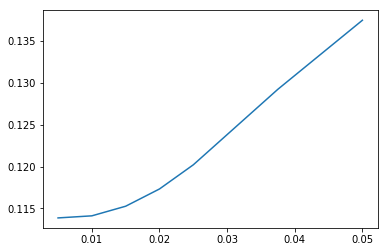

In [15]:
plt.plot(alphas, mses)